In [ ]:
import numpy as np
import pandas as pd
import matplotlib.colors as clr
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams["font.family"] = "Times"
plt.rcParams['text.usetex'] = True
plt.rcParams["font.size"] = 12
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
cm = 1/2.54 

### Create custom colormap for decision boundaries

In [2]:
colors = [(0, 0.37, 0.63), (0.863, 0.078, 0.235), (1, 0.84, 0)]  # R -> G -> B
n_bins = 8
cmap_name = 'my_list'
cus_cmap = clr.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

### Plot curves

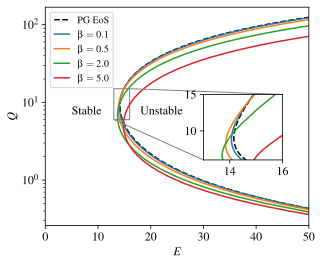

In [3]:
fig, ax = plt.subplots(figsize=(12*cm,10*cm))
axins = ax.inset_axes([0.6,0.3,0.3,0.3],xlim=(13,16),ylim=(6,15))#, xticklabels=[], yticklabels=[])

data = pd.read_csv('data.csv')
beta_ = [0.0,0.1,0.5,2.0,5.0]
for i in range(5):
    if i == 0:
        line, = ax.semilogy(data[f'E{i+1}'], data[f'Q{i+1}'],'k--',label = "PG EoS")
        axins.plot(data[f'E{i+1}'], data[f'Q{i+1}'],'k--')
    else:
        line, = ax.semilogy(data[f'E{i+1}'], data[f'Q{i+1}'],label = rf"$\beta = {beta_[i]}$")
        axins.plot(data[f'E{i+1}'], data[f'Q{i+1}'],c = line.get_c())

ax.set_xlabel(r'$E$')
ax.set_ylabel(r'$Q$')
ax.set_xlim(0,50)
ax.legend(ncol=1,fontsize=10,loc=2,handlelength=1.5)
mark_inset(ax,axins,loc1=1,loc2=3, fc="none", ec="0.5")

ax.text(5,7,'Stable')
ax.text(18,7,'Unstable')
plt.savefig("test.pdf",bbox_inches="tight")

### Display data as an image: imshow

Text(0.5, 1.0, 'colorbar title')

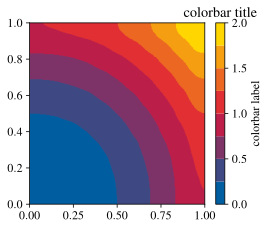

In [4]:
x = np.linspace(0,1,11)
[X,Y] = np.meshgrid(x,x)
Z = X**2 + Y**2

fig, ax = plt.subplots(figsize=(10*cm, 8.33*cm))
img = ax.imshow(np.flipud(Z),extent=[0,1,0,1],aspect='auto',interpolation = 'gaussian',cmap = cus_cmap)
cbar = fig.colorbar(img, ax=ax)
cbar.set_label('colorbar label')
cbar.ax.set_title('colorbar title')  